## K-NN K-최근접 이웃

In [1]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [4]:
cond = df['Species'].isin(['Bream', 'Smelt']) # isin() : 오른쪽 데이터가 왼쪽 데이터 안에 속해있나요?
lw_df = df.loc[cond, ['Length2', 'Weight']]
fish_data = lw_df.values.tolist()

In [5]:
fish_target = [1] * 35 + [0] * 14

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
kn = KNeighborsClassifier() # 인스턴스화 시키기

In [10]:
train_input = fish_data[:35] # 학습할 때 쓰는 데이터
train_target = fish_target[:35] # 학습할 때 쓰는 정답 데이터

test_input = fish_data[35:]
test_target = fish_target[35:]

In [12]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [13]:
kn.score(test_input, test_target)

0.0

In [14]:
import numpy as np

In [15]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [27]:
np.random.seed(42) # 랜덤번호 고정정
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [29]:
input_arr[[1, 3]] # fancy indexing

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [36]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [37]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [32]:
import matplotlib.pyplot as plt

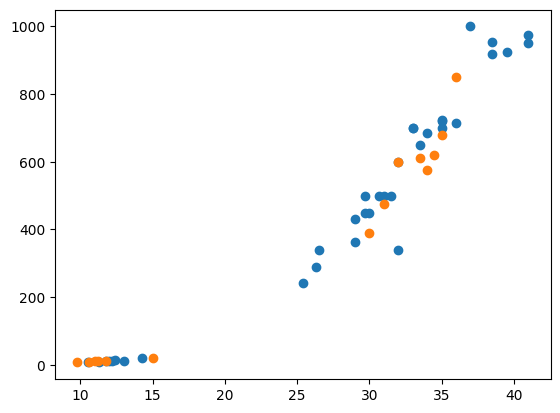

In [38]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1]) # train데이터와 test데이터가 골고루 분리됨

In [39]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [40]:
kn.score(test_input, test_target)

1.0

In [41]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## 예제 : iris

In [44]:
import seaborn as sns
iris = sns.load_dataset('iris')

# setosa, versicolor
# petal_length, petal_width

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [95]:
cond = iris['species'].isin(['setosa', 'versicolor'])
lw_df = iris.loc[cond, ['petal_length', 'petal_width']]
iris_data = lw_df.values.tolist()

In [96]:
# len(iris.loc[iris['species']=='setosa'])
len(iris.loc[iris['species']=='versicolor'])

iris_target = [1] * 50 + [0] * 50

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
kn = KNeighborsClassifier()

In [99]:
input_arr = np.array(iris_data)
target_arr = np.array(iris_target)

In [100]:
import numpy as np # 판다스

np.random.seed(100)
index = np.arange(100)
np.random.shuffle(index)

In [109]:
train_input = input_arr[index[:70]]
train_target = target_arr[index[:70]]

test_input = input_arr[index[70:]]
test_target = target_arr[index[70:]]

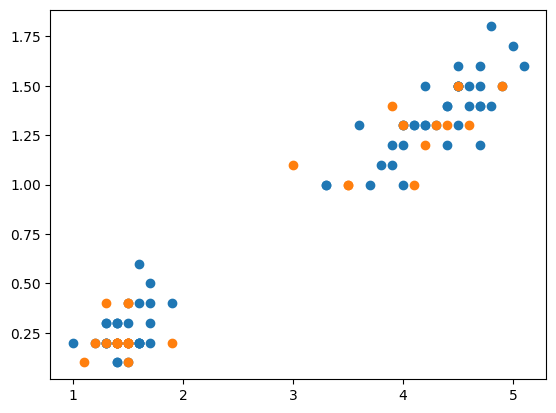

In [102]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])

In [72]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [73]:
kn.score(test_input, test_target)

1.0

In [74]:
kn.predict(test_input)

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1])

In [90]:
# 선생님
cond = iris['species'].isin(['setosa', 'versicolor'])
lw_df = iris.loc[cond, ['petal_length', 'petal_width']]
iris_data = lw_df.values

In [91]:
setosa_count = iris.loc[iris['species']=='setosa'].shape[0]
versicolor_count = iris.loc[iris['species']=='versicolor'].shape[0]

iris_target = np.array([1] * setosa_count + [0] * versicolor_count)

In [92]:
import random # 파이썬

index = list(range(setosa_count + versicolor_count))
random.shuffle(index)
# index

In [93]:
train_input = iris_data[index[:70]]
train_target = iris_target[index[:70]]

test_input = iris_data[index[70:]]
test_target = iris_target[index[70:]]

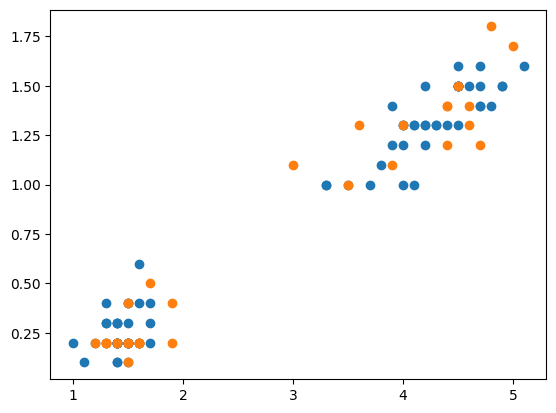

In [94]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
kn = KNeighborsClassifier()

In [105]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [106]:
kn.score(test_input, test_target)

1.0

In [107]:
kn.predict(test_input)

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1])